This notebook will be similar to the [chlorophyll notebook](https://github.com/dgumustel/blog_visualizations/tree/main/chlorophyll) but will map sea surface temperature (SST) instead of chlorophyll concentrations.

In [1]:
import netCDF4
import xarray as xr
import cmocean
import os
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
parent_dir = os.getcwd()
file_path = os.path.join(parent_dir, 'data')
output_dir = os.path.join(parent_dir, 'visualizations')

try:
    os.mkdir(output_dir)
except OSError as error:
    print('Folder for visualizations exists.')
    
# ignore hidden files
files = [item for item in os.listdir(file_path) if not item.startswith('.')]

Folder for visualizations exists.


In [3]:
files

['AQUA_MODIS.20170101_20170131.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170201_20170228.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170301_20170331.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170401_20170430.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170601_20170630.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170701_20170731.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170801_20170831.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20210301_20210331.L3m.MO.SST.sst.4km (1).nc']

In [4]:
datasets = [xr.open_dataset('./data/' + file) for file in files]

In [5]:
datasets[-1].attrs

{'product_name': 'AQUA_MODIS.20210301_20210331.L3m.MO.SST.sst.4km.nc',
 'instrument': 'MODIS',
 'title': 'MODISA Level-3 Standard Mapped Image',
 'project': 'Ocean Biology Processing Group (NASA/GSFC/OBPG)',
 'platform': 'Aqua',
 'temporal_range': 'month',
 'processing_version': 'R2019.0',
 'date_created': '2021-05-21T03:01:10.000Z',
 'history': 'l3mapgen par=AQUA_MODIS.20210301_20210331.L3m.MO.SST.sst.4km.nc.param ',
 'l2_flag_names': 'LAND,HISOLZEN',
 'time_coverage_start': '2021-03-01T00:25:01.000Z',
 'time_coverage_end': '2021-04-01T02:49:59.000Z',
 'start_orbit_number': 100129,
 'end_orbit_number': 100581,
 'map_projection': 'Equidistant Cylindrical',
 'latitude_units': 'degrees_north',
 'longitude_units': 'degrees_east',
 'northernmost_latitude': 90.0,
 'southernmost_latitude': -90.0,
 'westernmost_longitude': -180.0,
 'easternmost_longitude': 180.0,
 'geospatial_lat_max': 90.0,
 'geospatial_lat_min': -90.0,
 'geospatial_lon_max': 180.0,
 'geospatial_lon_min': -180.0,
 'latitude_

In [6]:
datasets[-1].data_vars

Data variables:
    sst       (lat, lon) float32 ...
    qual_sst  (lat, lon) float32 ...
    palette   (rgb, eightbitcolor) uint8 ...

In [7]:
# Curious what the max and min values are
datasets[-1].variables['sst']

<xarray.Variable (lat: 4320, lon: 8640)>
[37324800 values with dtype=float32]
Attributes:
    long_name:      Sea Surface Temperature
    units:          degree_C
    standard_name:  sea_surface_temperature
    valid_min:      -1000
    valid_max:      10000
    display_scale:  linear
    display_min:    -2.0
    display_max:    45.0

(array([3.74150e+04, 5.55300e+04, 9.06770e+04, 1.64741e+05, 2.69324e+05,
        2.98902e+05, 2.90998e+05, 3.19417e+05, 3.00812e+05, 2.75392e+05,
        2.58005e+05, 2.35469e+05, 2.46171e+05, 2.43322e+05, 2.29181e+05,
        1.93782e+05, 1.88350e+05, 1.79145e+05, 1.78969e+05, 1.77562e+05,
        1.88003e+05, 1.77756e+05, 1.73970e+05, 1.65734e+05, 1.56195e+05,
        1.48546e+05, 1.42151e+05, 1.45590e+05, 1.34361e+05, 1.30642e+05,
        1.31619e+05, 1.33369e+05, 1.31413e+05, 1.37085e+05, 1.38418e+05,
        1.40135e+05, 1.38237e+05, 1.36346e+05, 1.37833e+05, 1.49733e+05,
        1.55290e+05, 1.65612e+05, 1.76433e+05, 1.74001e+05, 1.71494e+05,
        1.77213e+05, 1.81946e+05, 1.85593e+05, 1.81484e+05, 1.93871e+05,
        2.08263e+05, 2.10274e+05, 2.05361e+05, 2.17309e+05, 2.26622e+05,
        2.56706e+05, 2.53031e+05, 2.50068e+05, 2.62604e+05, 2.71740e+05,
        2.82445e+05, 2.86998e+05, 3.11376e+05, 3.34741e+05, 3.65453e+05,
        4.03713e+05, 4.60056e+05, 5.67907e+05, 6.38

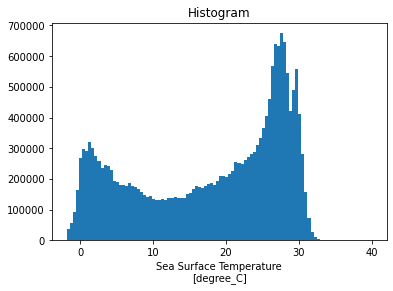

In [8]:
xr.plot.hist(datasets[-1].variables['sst'],bins=100)

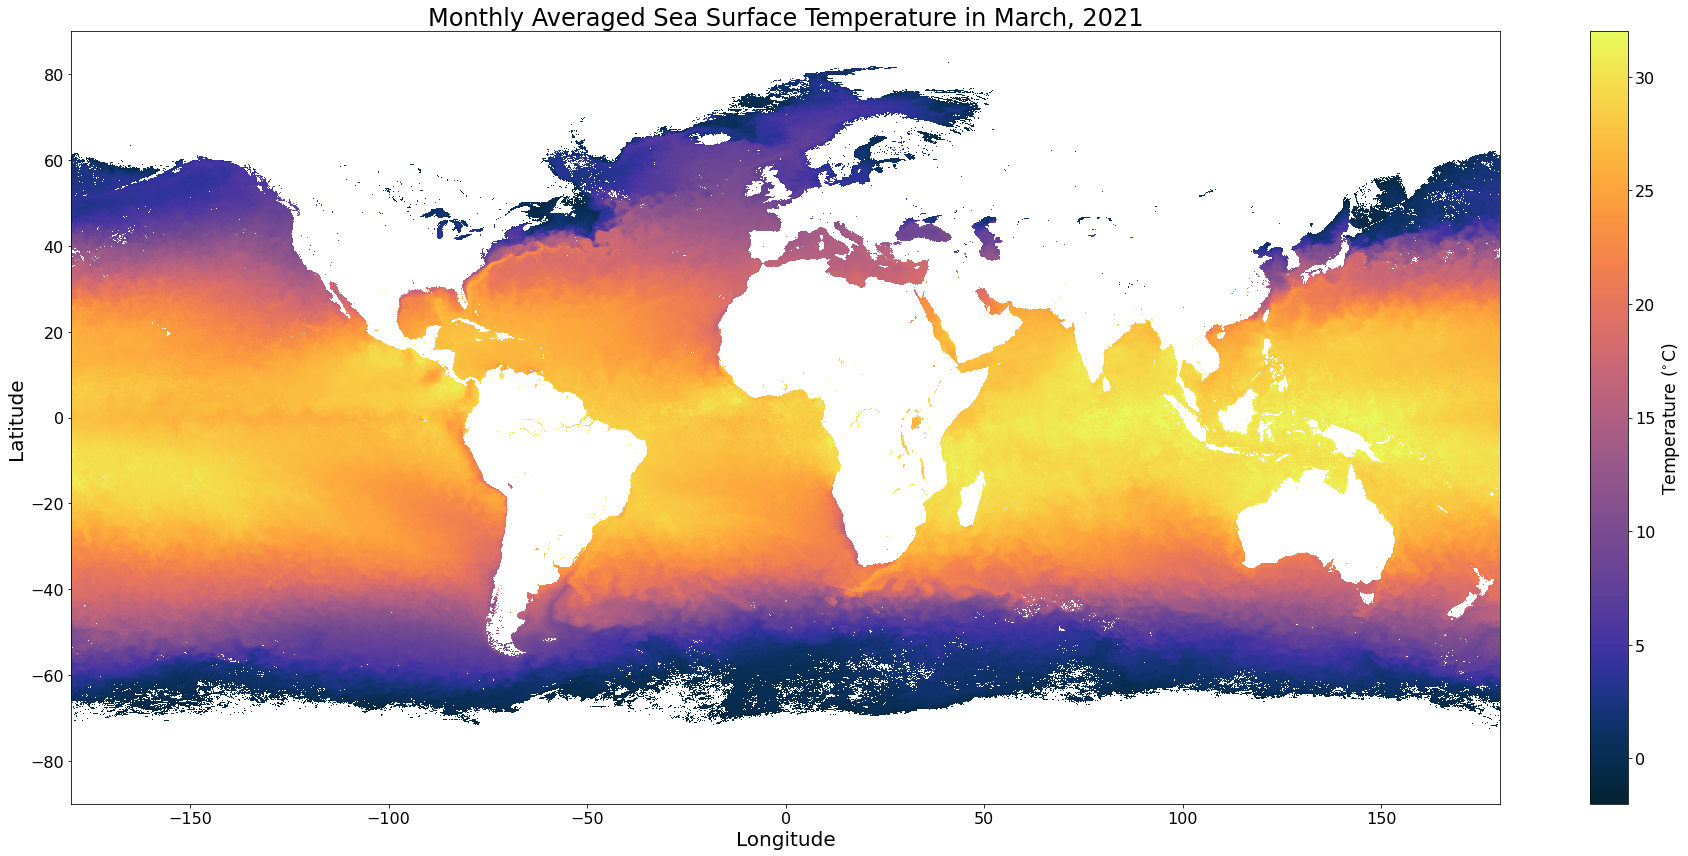

In [15]:
im = datasets[-1].sst.plot(x='lon', y='lat', figsize=(26,12), vmin=-2, vmax=32, cmap=cmocean.cm.thermal, add_colorbar=False)

cb = plt.colorbar(im)
cb.set_label(label = "Temperature ($^{\circ}$C)", size='xx-large')
cb.ax.tick_params(labelsize=16)

plt.title('Monthly Averaged Sea Surface Temperature in March, 2021', size=24)
plt.ylabel('Latitude', size=20)
plt.xlabel('Longitude', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.tight_layout()
plt.savefig('./visualizations/global_snapshot.png')

Look at the sharp contrast in temperatures between the Gulf Stream and the coast of Maine, Canada, and Newfoundland! 

I'm interested in the coast of Oregon, so I'll zoom in there.

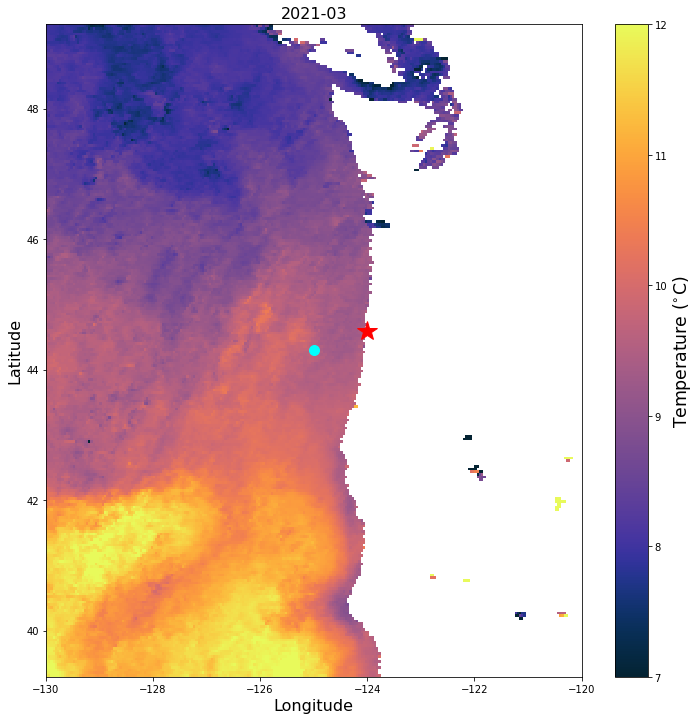

In [26]:
site_lat = 44.3
site_lon = -125
radius = 5

ds_slice = datasets[-1].sel(lat=slice(site_lat + radius, site_lat - radius), lon=slice(site_lon - radius, site_lon + radius))
im = ds_slice.sst.plot(x='lon', y='lat', figsize=(12,12), vmin=7, vmax=12, cmap=cmocean.cm.thermal, add_colorbar=False)

cb = plt.colorbar(im)
cb.set_label(label="Temperature ($^{\circ}$C)", size='xx-large')

plt.title(datasets[-1].attrs['time_coverage_start'][:7], size=16)
plt.xlabel('Longitude', size=16)
plt.ylabel('Latitude', size=16)
plt.plot(-125, 44.3, markersize=20, marker='.', color='cyan')
plt.plot(-124, 44.6, markersize=20, marker='*', color='red')

The above is SST in March 2021, but the time period I'm curious about is 2017, particularly the summer months where strong upwelling was recorded. See [this notebook](https://github.com/dgumustel/coastal-upwelling/blob/main/notebooks/02_data_analysis_2017.ipynb) for my 2017 OOI data analysis. 

In [18]:
files

['AQUA_MODIS.20170101_20170131.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170201_20170228.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170301_20170331.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170401_20170430.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170601_20170630.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170701_20170731.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20170801_20170831.L3m.MO.SST.sst.4km.nc',
 'AQUA_MODIS.20210301_20210331.L3m.MO.SST.sst.4km (1).nc']

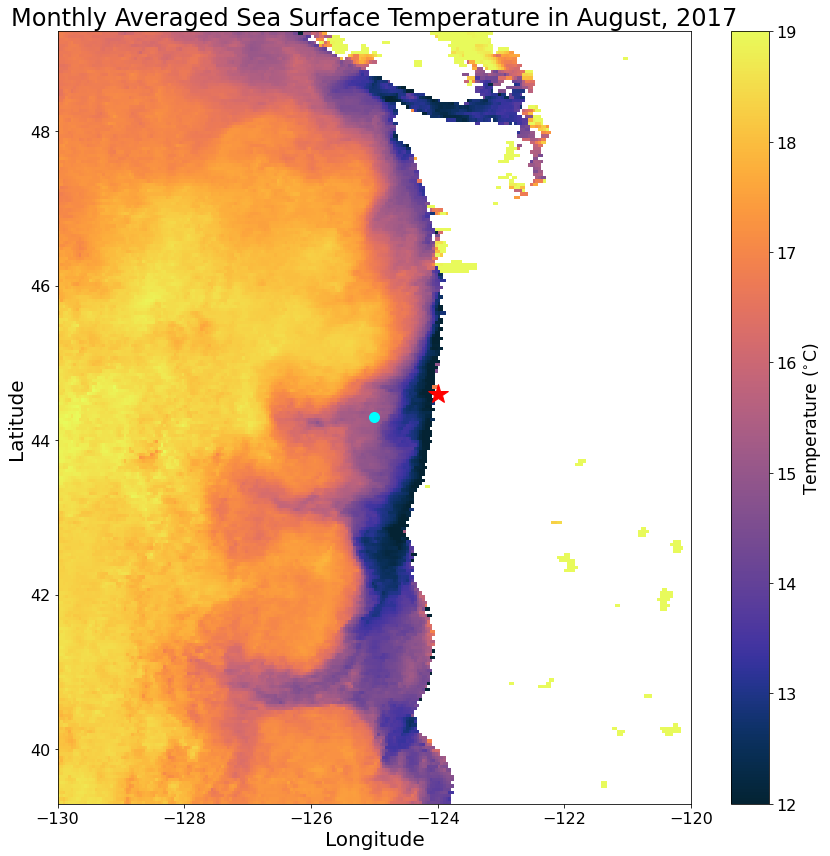

In [36]:
vmin = 12
vmax = 19

ds = datasets[6]
ds_slice = ds.sel(lat=slice(site_lat + radius, site_lat - radius), lon=slice(site_lon - radius, site_lon + radius))
im = ds_slice.sst.plot(x='lon', y='lat', figsize=(12,12), vmin=vmin, vmax=vmax, cmap=cmocean.cm.thermal, add_colorbar=False)

cb = plt.colorbar(im)
cb.set_label(label="Temperature ($^{\circ}$C)", size='xx-large')
cb.ax.tick_params(labelsize=16)

plt.title('Monthly Averaged Sea Surface Temperature in August, 2017', size=24)
plt.xlabel('Longitude', size=20)
plt.ylabel('Latitude', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.plot(-125, 44.3, markersize=20, marker='.', color='cyan')
plt.plot(-124, 44.6, markersize=20, marker='*', color='red')

plt.tight_layout()
plt.savefig(f'./visualizations/{ds.attrs["time_coverage_start"][:7]}.png')

The above plot is during the upwelling season, but what about months that don't see upwelling?

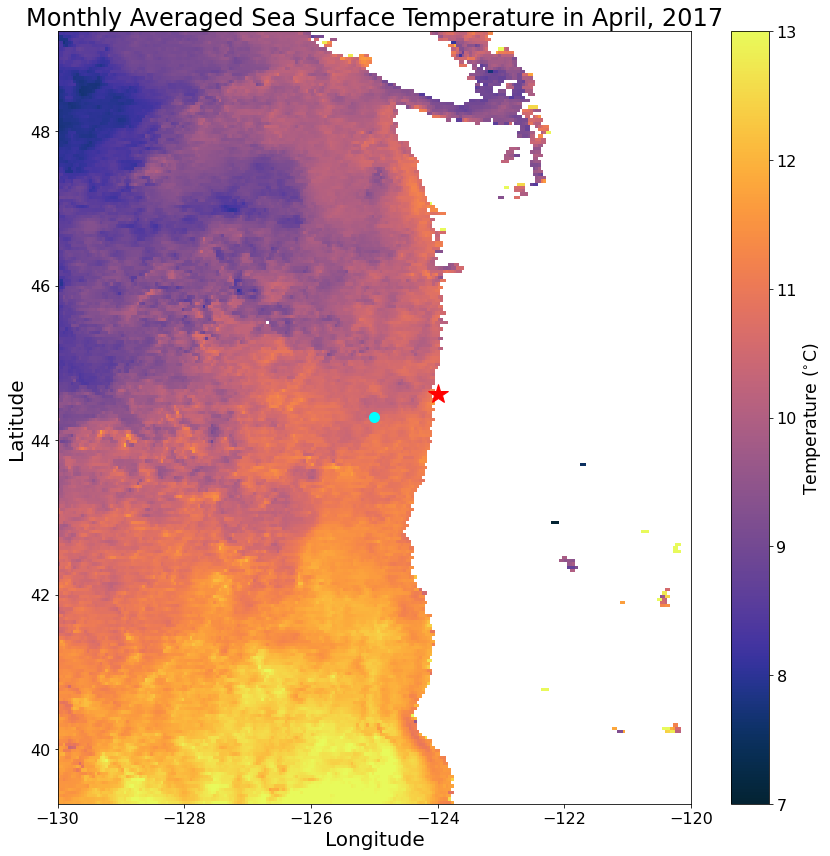

In [41]:
vmin = 7
vmax = 13

ds = datasets[3]
ds_slice = ds.sel(lat=slice(site_lat + radius, site_lat - radius), lon=slice(site_lon - radius, site_lon + radius))
im = ds_slice.sst.plot(x='lon', y='lat', figsize=(12,12), vmin=vmin, vmax=vmax, cmap=cmocean.cm.thermal, add_colorbar=False)

cb = plt.colorbar(im)
cb.set_label(label="Temperature ($^{\circ}$C)", size='xx-large')
cb.ax.tick_params(labelsize=16)

plt.title('Monthly Averaged Sea Surface Temperature in April, 2017', size=24)
plt.xlabel('Longitude', size=20)
plt.ylabel('Latitude', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.plot(-125, 44.3, markersize=20, marker='.', color='cyan')
plt.plot(-124, 44.6, markersize=20, marker='*', color='red')

plt.tight_layout()
plt.savefig(f'./visualizations/{ds.attrs["time_coverage_start"][:7]}.png')

There, now we have two good comparison plots - August for upwelling and April for non upwelling. 